In [5]:
# quick and dirty evaluation of sample data gained in the first lecture in winter term 2025
# @author: Barbara Staehle, HTWG Konstanz
# bstaehle@htwg-konstanz.de
# coauther: leChat https://chat.mistral.ai/chat


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns



# Univariate Statistiken

In [2]:
# attention - in the first Version of the .csv-file, there was an ö camouflaged as a 0, hence evaluating Q9 returned crap data

# read data from csv file, with separators ; while the , encodes float values
# for csv-file, see Moodle!
umfrage = pd.read_csv('../../data/zehn_Fragen_ws25_ain_clean2.csv',sep=';',decimal=',')

# Daten ausgeben
print(umfrage)

   Vollständiger Name  Q01_Körpergröße  Q02_Schuhgröße  Q03_Welches Semester  \
0             Anonym1              187              45                     3   
1             Anonym2              174              42                     4   
2             Anonym3              163              38                     4   
3             Anonym4              183              43                     4   
4             Anonym5              168              39                     4   
5             Anonym6              194              46                     4   
6             Anonym7              160              36                     3   
7             Anonym8              179              44                     3   
8             Anonym9              170              42                     3   
9            Anonym10              175              45                     3   
10           Anonym11              200              48                     3   
11           Anonym12              181  

In [3]:
# nice buil-in pandas feature, calculate important statistics in one run
umfrage_stats = umfrage.describe(include='all')
print(umfrage_stats)

       Vollständiger Name  Q01_Körpergröße  Q02_Schuhgröße  \
count                  35        35.000000       35.000000   
unique                 35              NaN             NaN   
top               Anonym1              NaN             NaN   
freq                    1              NaN             NaN   
mean                  NaN       178.571429       42.771429   
std                   NaN         9.331432        2.755590   
min                   NaN       160.000000       36.000000   
25%                   NaN       173.000000       42.000000   
50%                   NaN       179.000000       43.000000   
75%                   NaN       184.000000       44.500000   
max                   NaN       200.000000       48.000000   

        Q03_Welches Semester Q04_Lieblingsfach  Q05_Stochastik-Vorwissen  \
count              35.000000                34                 35.000000   
unique                   NaN                16                       NaN   
top                      Na

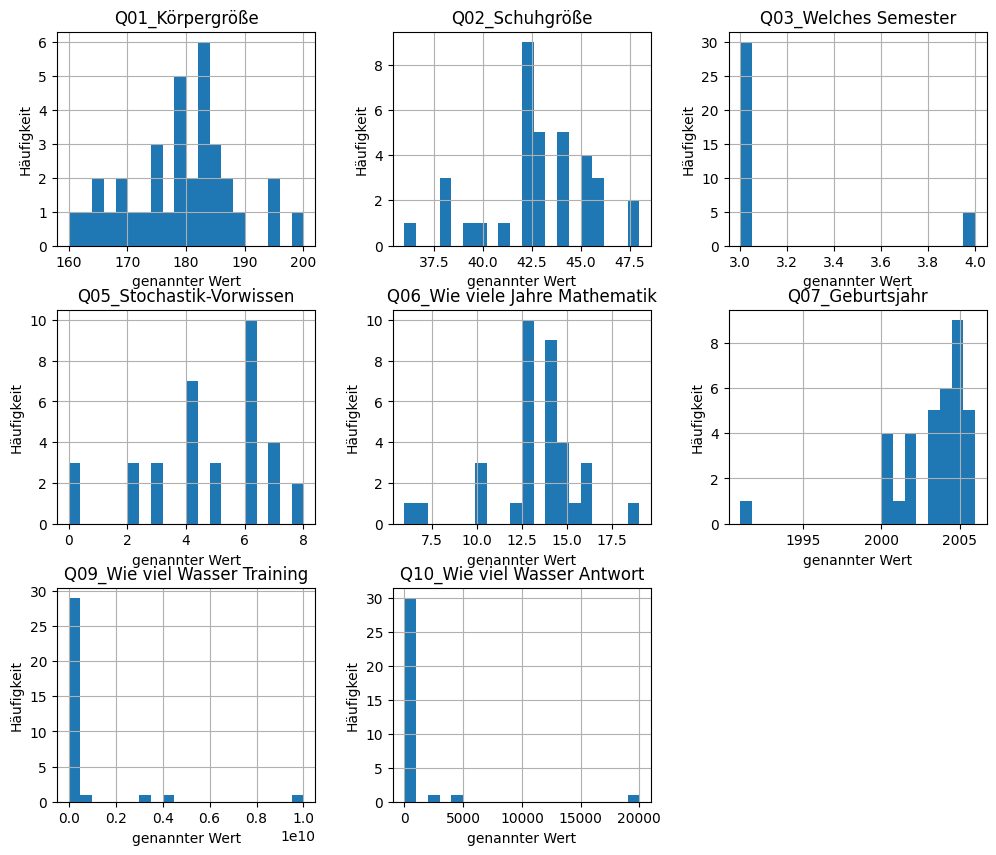

In [6]:
# now plot histograms of all data 
ax = umfrage.hist(figsize=(12, 10), bins=20)

# y-Achse für jedes Subplot beschriften
for a in ax.flatten():
    a.set_ylabel('Häufigkeit')
    a.set_xlabel('genannter Wert')

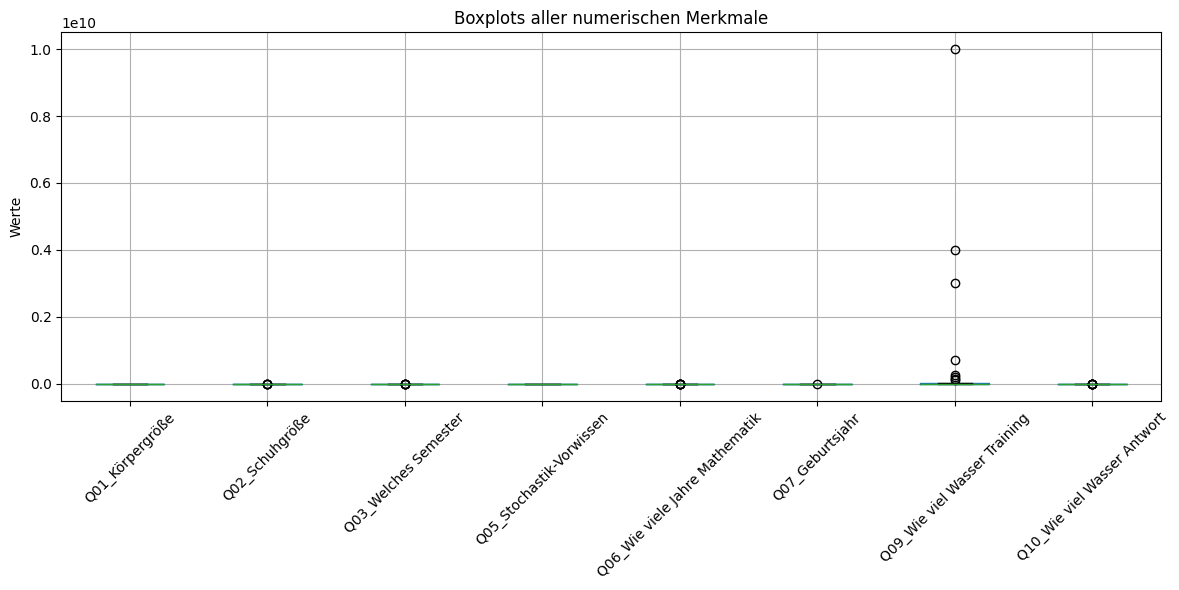

In [7]:
# Boxplots für alle numerischen Spalten erstellen
numerische_daten = umfrage.select_dtypes(include=['float64', 'int64'])
numerische_daten.boxplot(figsize=(12, 6))

# nicht schlau in einem Graph: Werte sind zu unterschiedlich

# Titel und Achsen beschriften
plt.title('Boxplots aller numerischen Merkmale')
plt.ylabel('Werte')
plt.xticks(rotation=45)  # X-Achsen-Beschriftungen drehen, falls nötig
plt.tight_layout()
plt.show()

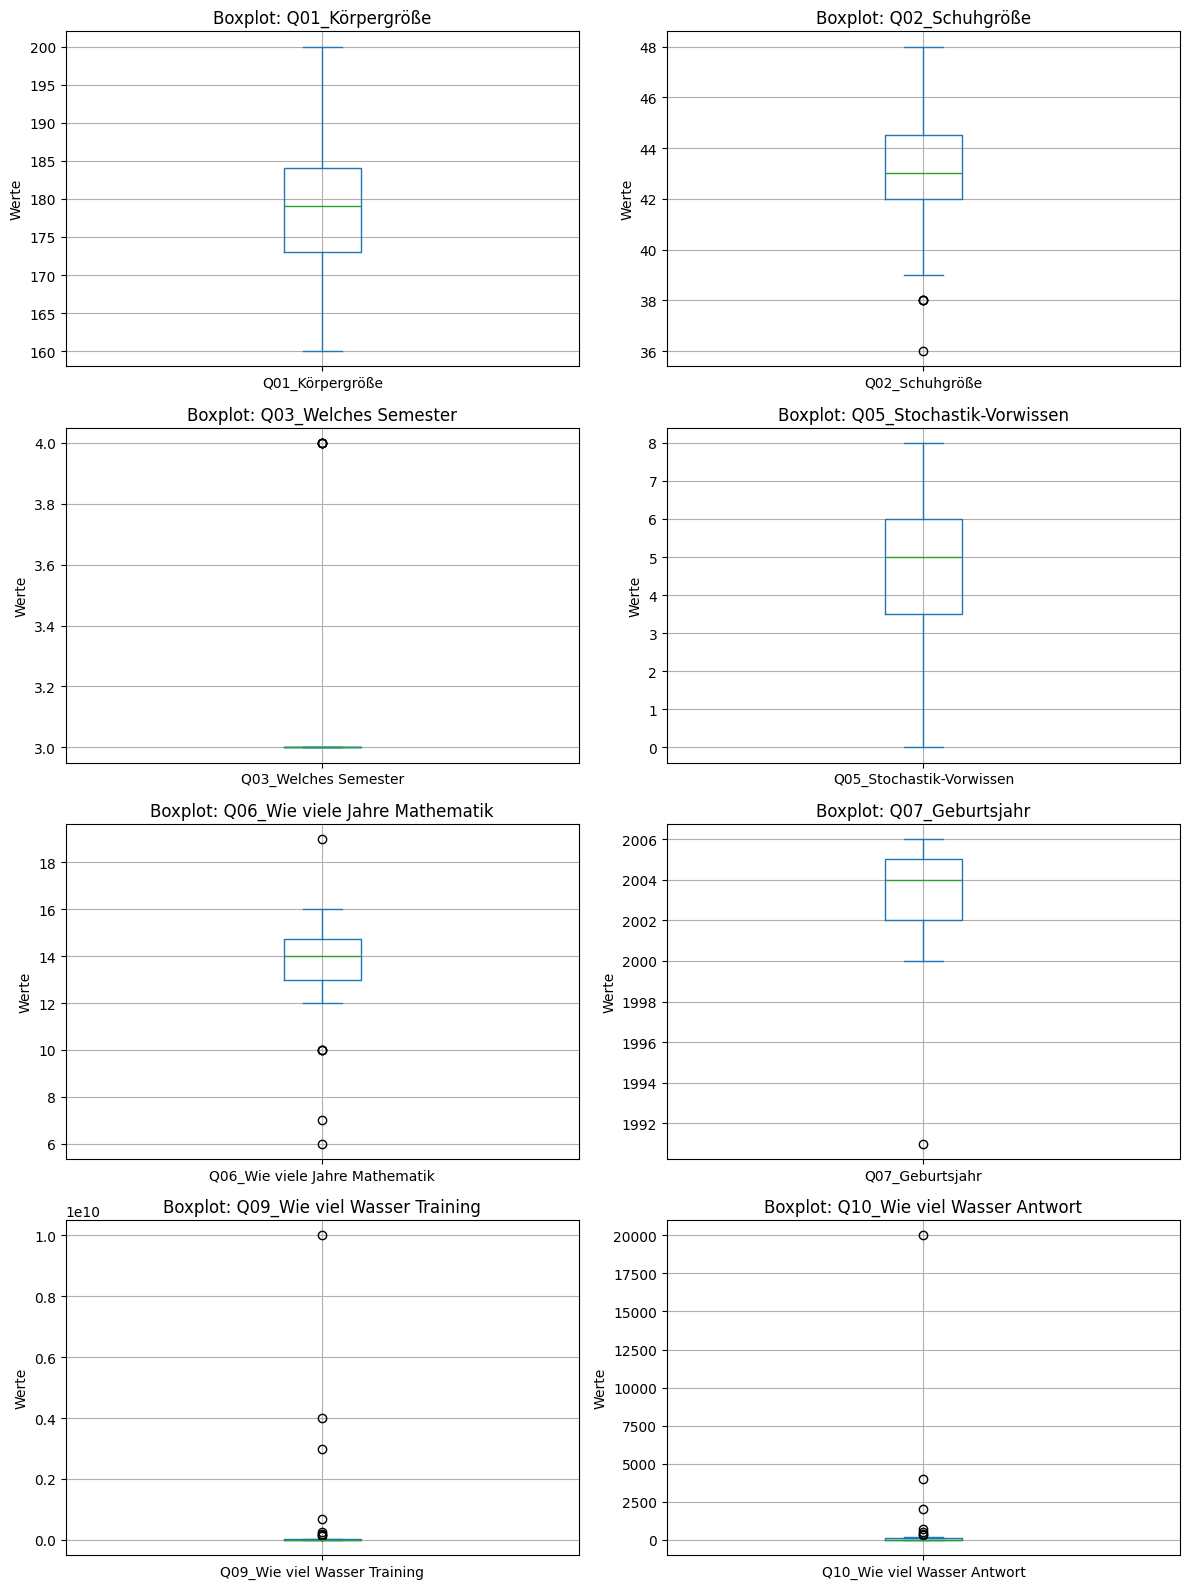

In [9]:
# Boxplots nebeneinander und untereinander darstellen 

# hier muss man das haendisch machen, nur pandas ordnet das hübsch an

# Anzahl der Spalten
n_spalten = len(numerische_daten.columns)

# Anzahl der Zeilen berechnen (z. B. 2 Spalten pro Zeile)
n_zeilen = int(np.ceil(n_spalten / 2))

# Gitter erstellen
fig, axes = plt.subplots(n_zeilen, 2, figsize=(12, 4 * n_zeilen))
axes = axes.flatten()  # Flatten für einfache Iteration

# Boxplots zeichnen
for i, spalte in enumerate(numerische_daten.columns):
    numerische_daten[spalte].plot(kind='box', ax=axes[i], vert=True)
    axes[i].set_title(f'Boxplot: {spalte}')
    axes[i].set_ylabel('Werte')
    axes[i].grid(True)

# Leere Subplots ausblenden (falls ungerade Anzahl)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


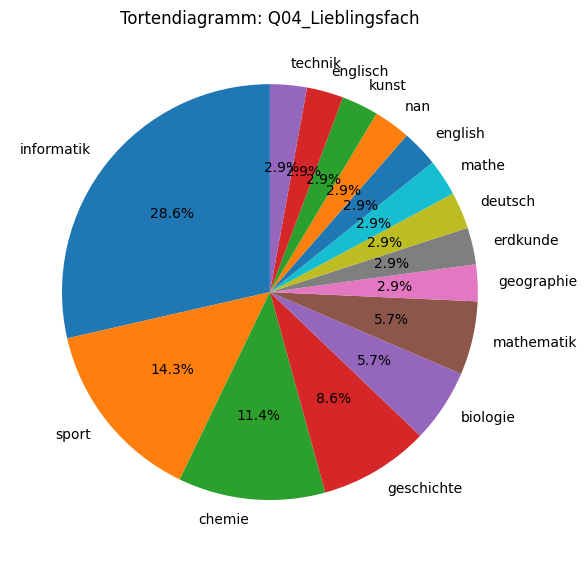

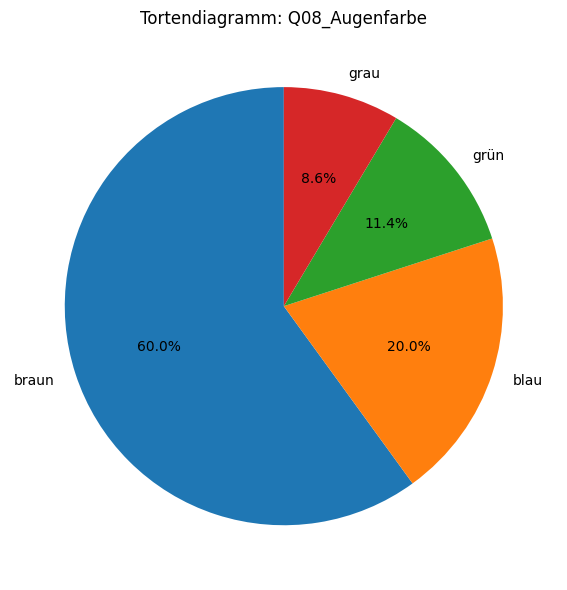

In [27]:
# Tortendiagramme für kategoriale Daten
kategoriale_spalten = umfrage.select_dtypes(include=['object', 'category'])

# Erste Spalte ignorieren (z. B. Index oder irrelevante Spalte)
kategoriale_spalten = kategoriale_spalten.iloc[:, 1:]

# Tortendiagramme für jede kategoriale Spalte erstellen
for spalte in kategoriale_spalten.columns:
    # Groß-/Kleinschreibung harmonisieren (z. B. alles in Kleinbuchstaben)
    umfrage[spalte] = umfrage[spalte].astype(str).str.lower()  # oder .str.upper()

    # Optional: Leerzeichen entfernen
    umfrage[spalte] = umfrage[spalte].str.replace(' ', '')  # Entfernt alle Leerzeichen

    # Häufigkeiten der Kategorien berechnen
    haeufigkeiten = umfrage[spalte].value_counts()

    # Tortendiagramm erstellen
    plt.figure(figsize=(6, 6))
    haeufigkeiten.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Tortendiagramm: {spalte}')
    plt.ylabel('')  # Entfernt die leere y-Achsen-Beschriftung
    plt.tight_layout()
    plt.show()

In [14]:
# Live-Beispiel aus der Vorlesung: Arbeite nur mit den Körpergrößen 

size = umfrage.Q01_Körpergröße
print(size)

0     187
1     174
2     163
3     183
4     168
5     194
6     160
7     179
8     170
9     175
10    200
11    181
12    182
13    176
14    182
15    180
16    178
17    164
18    182
19    179
20    195
21    178
22    166
23    168
24    178
25    185
26    187
27    185
28    183
29    185
30    175
31    183
32    172
33    165
34    188
Name: Q01_Körpergröße, dtype: int64


In [15]:
# zeige die unteschiedlichen Methoden, um Quantile zu berechen

###############################################
# default (falls nichts angegeben wird: linear)
###############################################

# https://numpy.org/doc/stable/reference/generated/numpy.quantile.html
quant_methods = [
    'linear', 'lower', 'higher', 'nearest', 'midpoint',
    'inverted_cdf', 'averaged_inverted_cdf', 'closest_observation',
    'interpolated_inverted_cdf', 'hazen', 'weibull',
    'median_unbiased', 'normal_unbiased'
]

for m in quant_methods:
    quant_np = np.percentile(size, 90, method=m)
    print(f"NumPy (method='{m}'): 90%-Quantil = {quant_np}")
    #try:
    quant_pd = size.quantile(0.90, interpolation=m)
    print(f"Pandas (method='{m}'): 90%-Quantil = {quant_pd}")
    #except:
    #    print(f"Pandas (method='{m}') not available")

NumPy (method='linear'): 90%-Quantil = 187.6
Pandas (method='linear'): 90%-Quantil = 187.6
NumPy (method='lower'): 90%-Quantil = 187
Pandas (method='lower'): 90%-Quantil = 187
NumPy (method='higher'): 90%-Quantil = 188
Pandas (method='higher'): 90%-Quantil = 188
NumPy (method='nearest'): 90%-Quantil = 188
Pandas (method='nearest'): 90%-Quantil = 188
NumPy (method='midpoint'): 90%-Quantil = 187.5
Pandas (method='midpoint'): 90%-Quantil = 187.5
NumPy (method='inverted_cdf'): 90%-Quantil = 188
Pandas (method='inverted_cdf'): 90%-Quantil = 188
NumPy (method='averaged_inverted_cdf'): 90%-Quantil = 188.0
Pandas (method='averaged_inverted_cdf'): 90%-Quantil = 188.0
NumPy (method='closest_observation'): 90%-Quantil = 187
Pandas (method='closest_observation'): 90%-Quantil = 187
NumPy (method='interpolated_inverted_cdf'): 90%-Quantil = 187.5
Pandas (method='interpolated_inverted_cdf'): 90%-Quantil = 187.5
NumPy (method='hazen'): 90%-Quantil = 188.0
Pandas (method='hazen'): 90%-Quantil = 188.0
Nu

In [17]:
# zeige Tabelle mit aktuell vorhandenen Variablen und Typ an 

%whos

Variable              Type         Data/Info
--------------------------------------------
a                     Axes         Axes(0.684722,0.11;0.215278x0.213889)
ax                    ndarray      3x3: 9 elems, type `object`, 72 bytes
axes                  ndarray      8: 8 elems, type `object`, 64 bytes
fig                   Figure       Figure(1200x1600)
haeufigkeiten         Series       Q08_Augenfarbe\nbraun    <...>Name: count, dtype: int64
i                     int          7
kategoriale_spalten   DataFrame       Q04_Lieblingsfach Q08_<...>    Chemie          Braun
m                     str          normal_unbiased
n_spalten             int          8
n_zeilen              int          4
np                    module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
numerische_daten      DataFrame        Q01_Körpergröße  Q02_<...>                   5.00  
pd                    module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                   m

In [19]:
# Basis-Statistiken für die Größe
print(size.describe())

count     35.000000
mean     178.571429
std        9.331432
min      160.000000
25%      173.000000
50%      179.000000
75%      184.000000
max      200.000000
Name: Q01_Körpergröße, dtype: float64



# Multivariate Statistiken

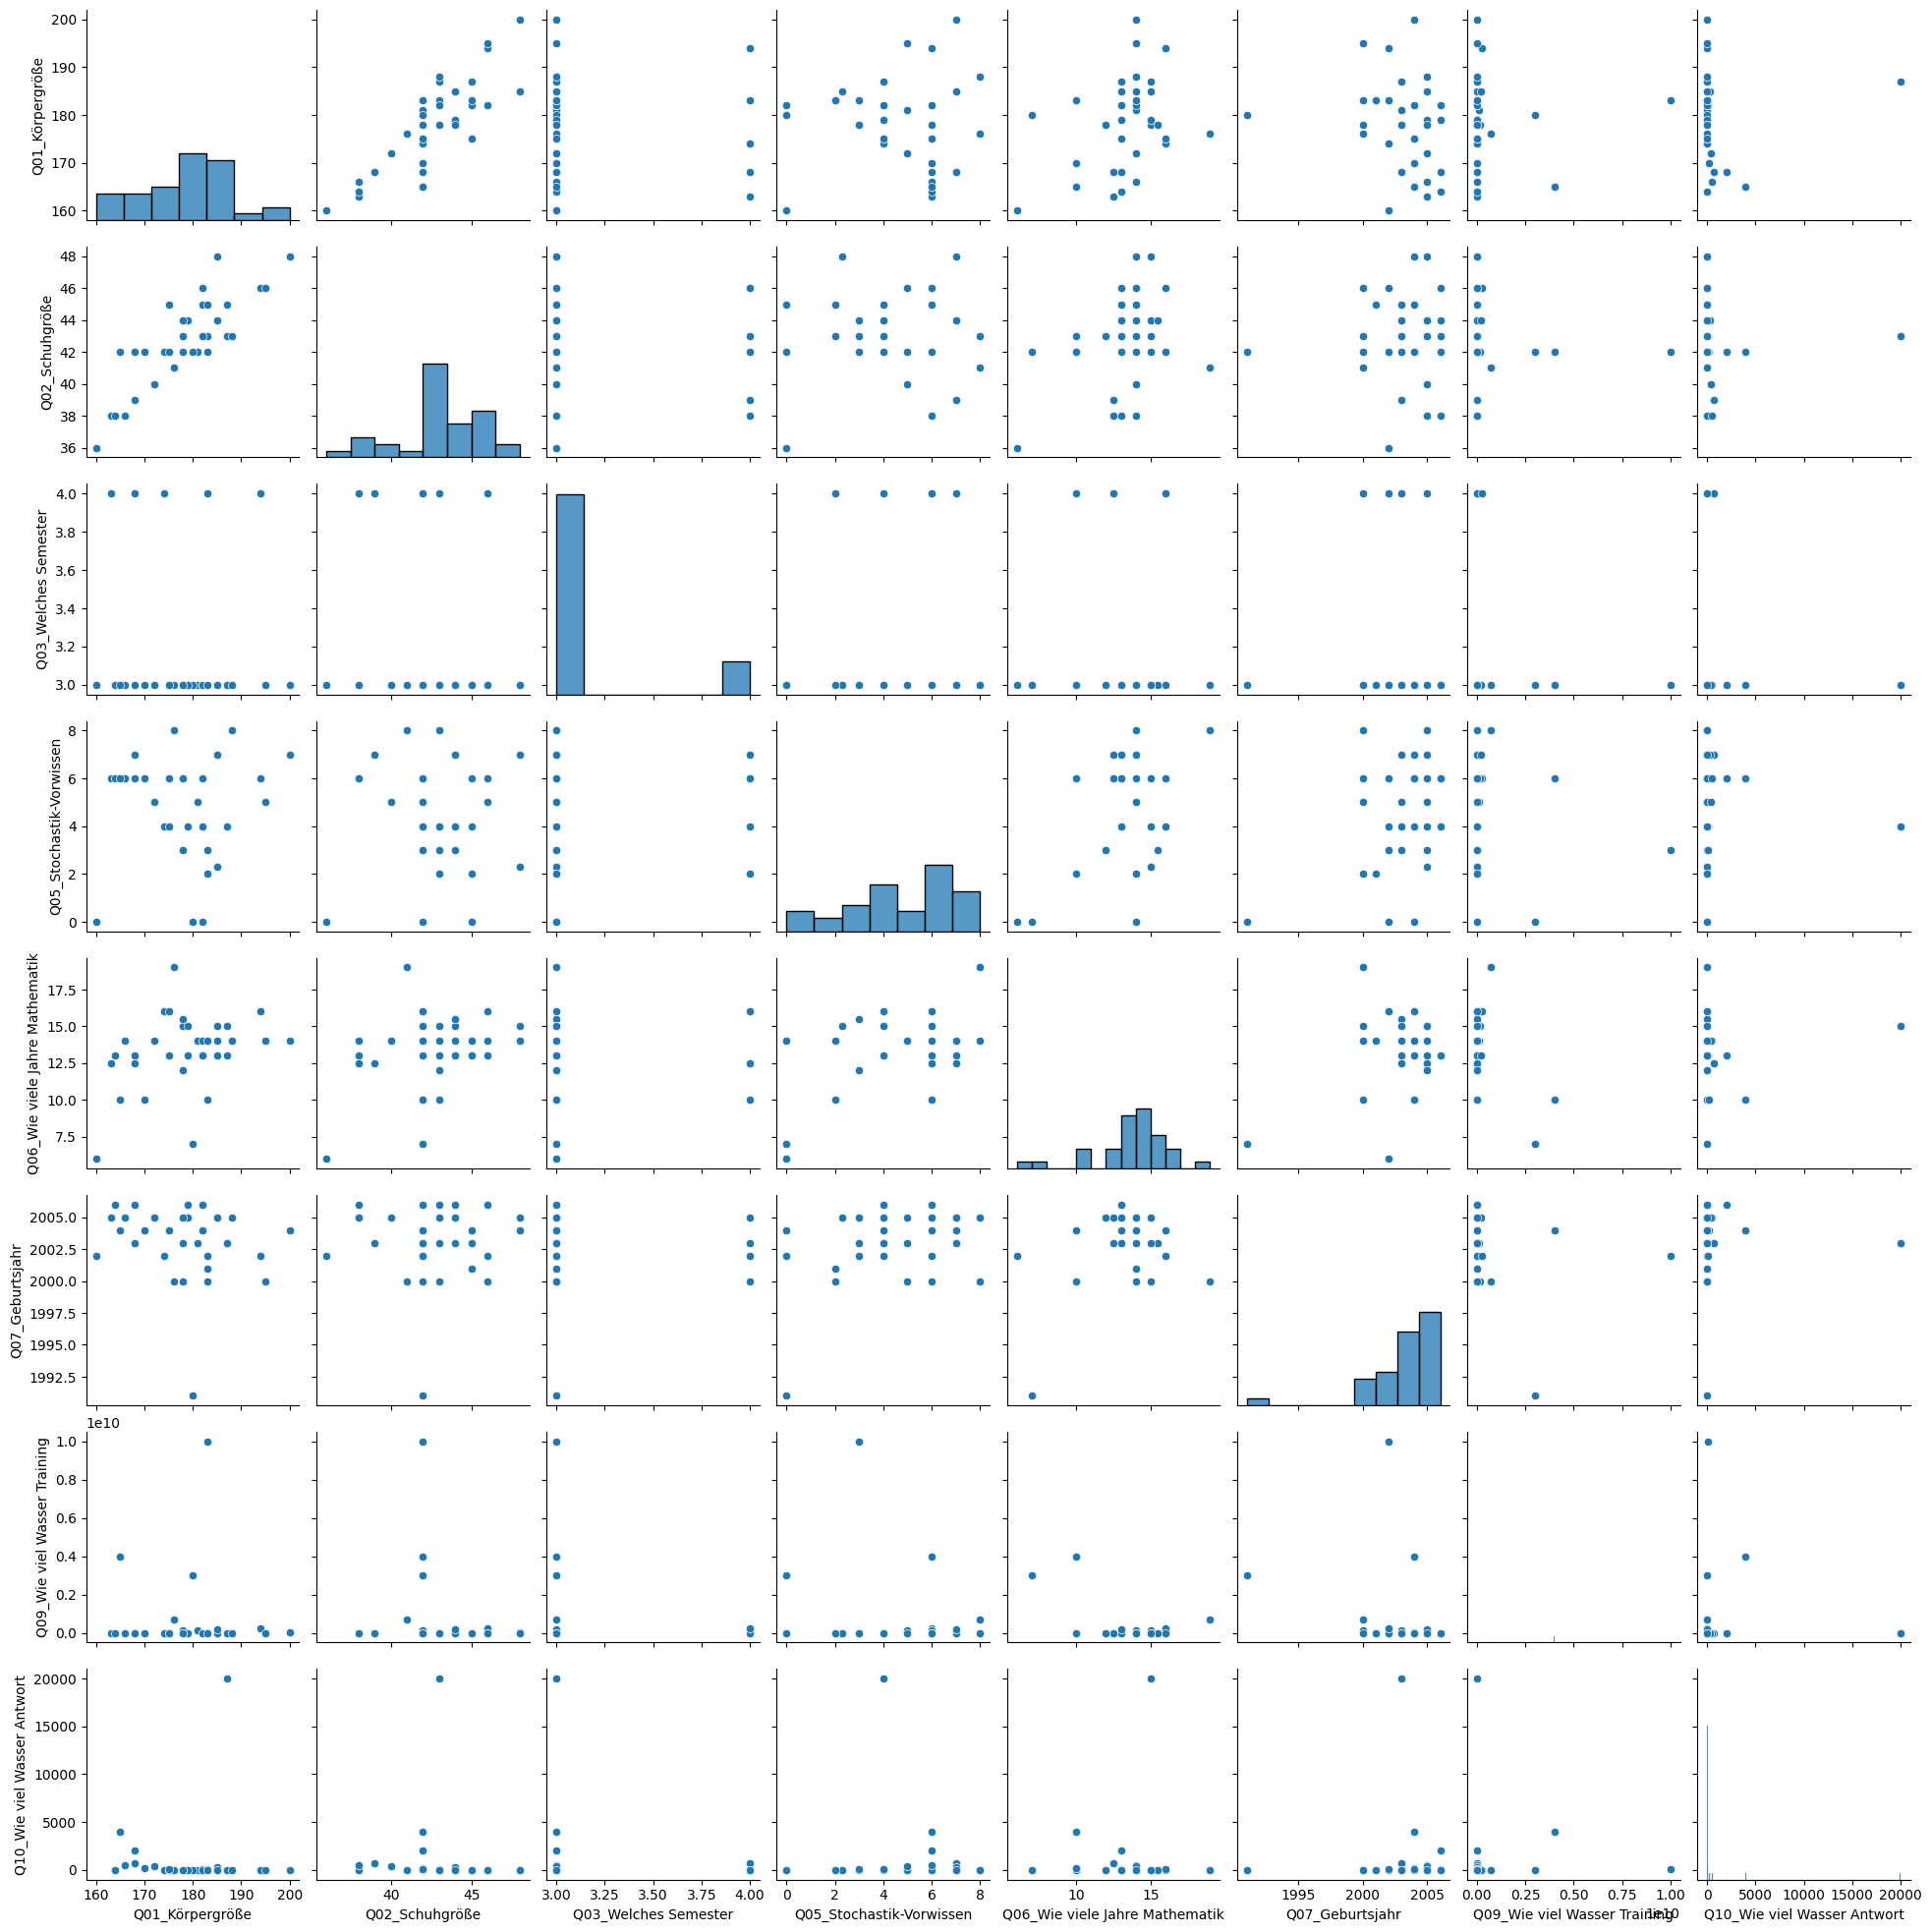

In [21]:
# erstelle einen Scatterplot für alle in der Umfrage erhobenen numerischen Daten 
sns.pairplot(umfrage)
plt.show()

In [33]:
# Korrelationsmatrix berechnen
# berechene also die Korrelation jeden Datenpaares miteinander
korrelation = numerische_daten.corr()

print(korrelation.values)

# Bestimmtheitsmaß (R²) berechnen
r_squared = korrelation ** 2


[[ 1.          0.83221162 -0.09638649  0.0180288   0.34672262 -0.16265171
  -0.02938058  0.05021245]
 [ 0.83221162  1.         -0.17608409 -0.02669353  0.32749471  0.02282877
  -0.12302121 -0.05894974]
 [-0.09638649 -0.17608409  1.          0.06957138  0.01543668 -0.12536619
  -0.11504622 -0.07337136]
 [ 0.0180288  -0.02669353  0.06957138  1.          0.4166675   0.3935568
  -0.18945826 -0.01827017]
 [ 0.34672262  0.32749471  0.01543668  0.4166675   1.          0.26295834
  -0.49030246  0.05122935]
 [-0.16265171  0.02282877 -0.12536619  0.3935568   0.26295834  1.
  -0.27776642  0.01807633]
 [-0.02938058 -0.12302121 -0.11504622 -0.18945826 -0.49030246 -0.27776642
   1.          0.00426669]
 [ 0.05021245 -0.05894974 -0.07337136 -0.01827017  0.05122935  0.01807633
   0.00426669  1.        ]]


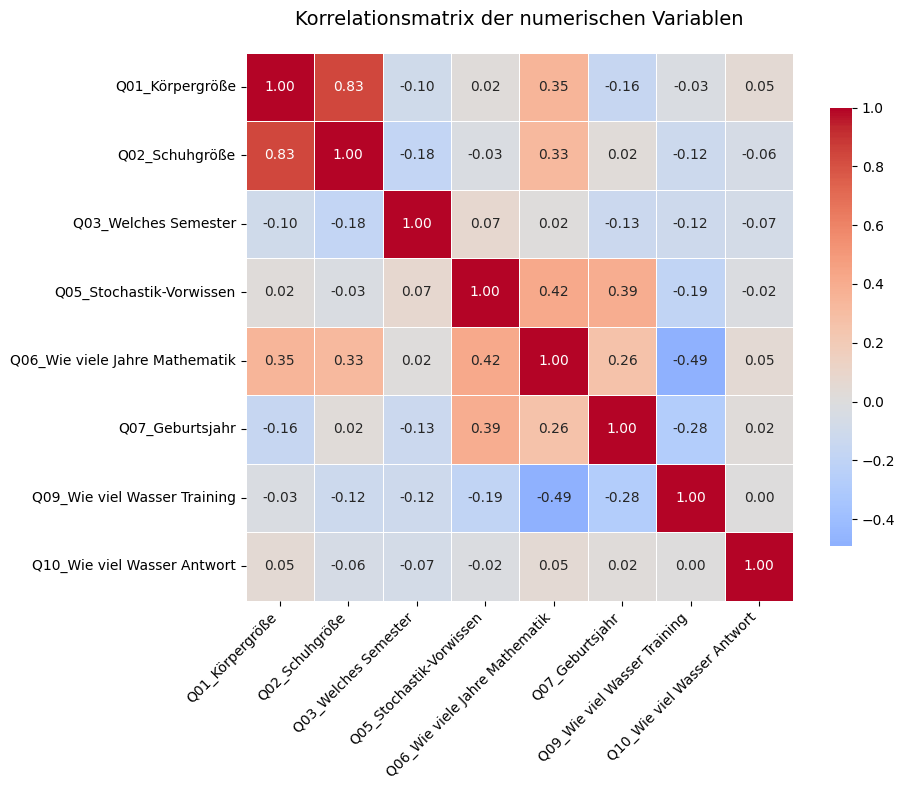

In [37]:
# Die Matrix jetzt als Heatmap graphisch darstellen
plt.figure(figsize=(10, 8))  # Größe der Heatmap anpassen

# Heatmap mit Annotations (Werte in den Zellen)
ax = sns.heatmap(
    korrelation,
    annot=True,          # Zeigt die Korrelationswerte in den Zellen an
    fmt=".2f",           # Formatierung der Werte (2 Dezimalstellen)
    cmap='coolwarm',     # Farbpalette (z. B. 'coolwarm', 'viridis', 'RdBu')
    center=0,            # Zentriert die Farbskala bei 0
    square=True,         # Quadratische Zellen
    linewidths=0.5,      # Linien zwischen den Zellen
    cbar_kws={"shrink": 0.8}  # Größe der Farbskala anpassen
)

# Titel hinzufügen
plt.title('Korrelationsmatrix der numerischen Variablen', pad=20, fontsize=14)

# Achsenbeschriftungen drehen (falls nötig)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Platz optimieren
plt.tight_layout()
plt.show()


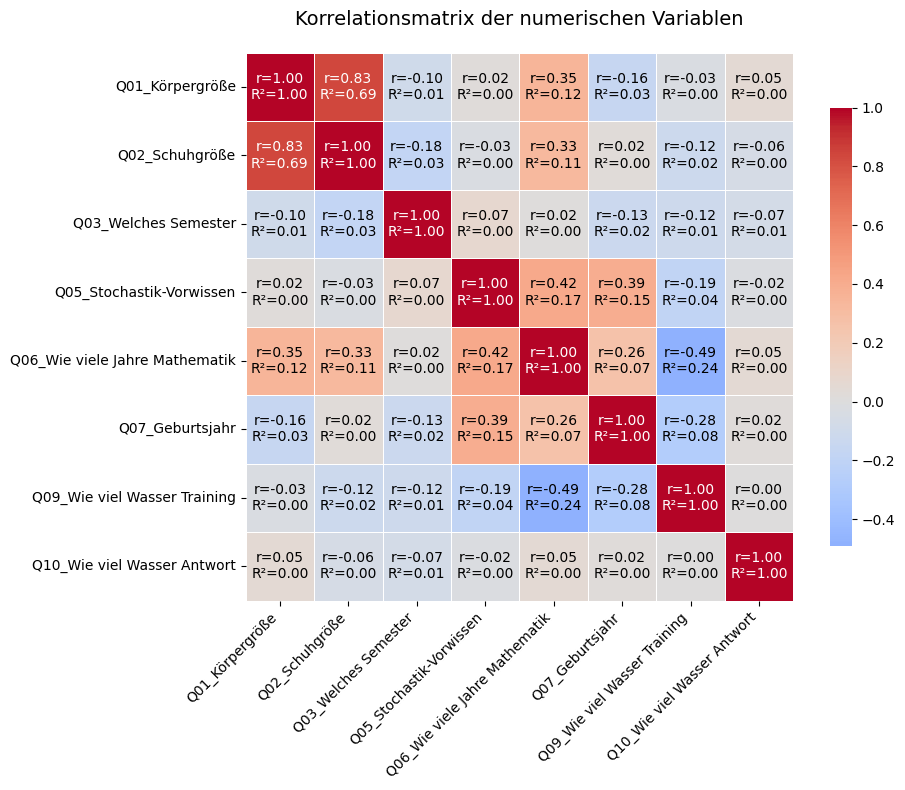

In [38]:
# Die Matrix jetzt als Heatmap mit Bestimmtheitsmaß graphisch darstellen
plt.figure(figsize=(10, 8))  # Größe der Heatmap anpassen

# Heatmap mit Annotations (Werte in den Zellen)
ax = sns.heatmap(
    korrelation,
    annot=False,          # Zeigt die Korrelationswerte in den Zellen an
    fmt=".2f",           # Formatierung der Werte (2 Dezimalstellen)
    cmap='coolwarm',     # Farbpalette (z. B. 'coolwarm', 'viridis', 'RdBu')
    center=0,            # Zentriert die Farbskala bei 0
    square=True,         # Quadratische Zellen
    linewidths=0.5,      # Linien zwischen den Zellen
    cbar_kws={"shrink": 0.8}  # Größe der Farbskala anpassen
)

# Manuell Annotations für r und R² hinzufügen
for i in range(len(korrelation)):
    for j in range(len(korrelation)):
        r = korrelation.iloc[i, j]
        r2 = r_squared.iloc[i, j]
        ax.text(
            j + 0.5,  # x-Position (Mitte der Zelle)
            i + 0.5,  # y-Position (Mitte der Zelle)
            f"r={r:.2f}\nR²={r2:.2f}",  # Text: r und R²
            ha='center',  # Horizontale Ausrichtung
            va='center',  # Vertikale Ausrichtung
            color='black' if abs(r) < 0.5 else 'white'  # Farbe für bessere Lesbarkeit
        )

# Titel hinzufügen
plt.title('Korrelationsmatrix der numerischen Variablen', pad=20, fontsize=14)

# Achsenbeschriftungen drehen (falls nötig)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Platz optimieren
plt.tight_layout()
plt.show()


In [42]:
# Regressionsgeraden für Paarungen, deren Korrkoef groß genug ist 

schwelle = 0.3

# Paare mit |r| >= schwelle filtern
relevante_paare = []
for i in range(len(korrelation.columns)):
    for j in range(i + 1, len(korrelation.columns)):  # Vermeidet Duplikate (A-B und B-A)
        if abs(korrelation.iloc[i, j]) >= schwelle:
            relevante_paare.append((korrelation.columns[i], korrelation.columns[j], korrelation.iloc[i, j]))

print(f"Anzahl relevanter Paare: {len(relevante_paare)}")
for p in relevante_paare:
    print(p)

Anzahl relevanter Paare: 6
('Q01_Körpergröße', 'Q02_Schuhgröße', 0.8322116199013666)
('Q01_Körpergröße', 'Q06_Wie viele Jahre Mathematik', 0.3467226226444534)
('Q02_Schuhgröße', 'Q06_Wie viele Jahre Mathematik', 0.327494709207025)
('Q05_Stochastik-Vorwissen', 'Q06_Wie viele Jahre Mathematik', 0.41666749751520676)
('Q05_Stochastik-Vorwissen', 'Q07_Geburtsjahr', 0.39355679980307756)
('Q06_Wie viele Jahre Mathematik', 'Q09_Wie viel Wasser Training', -0.4903024591168471)


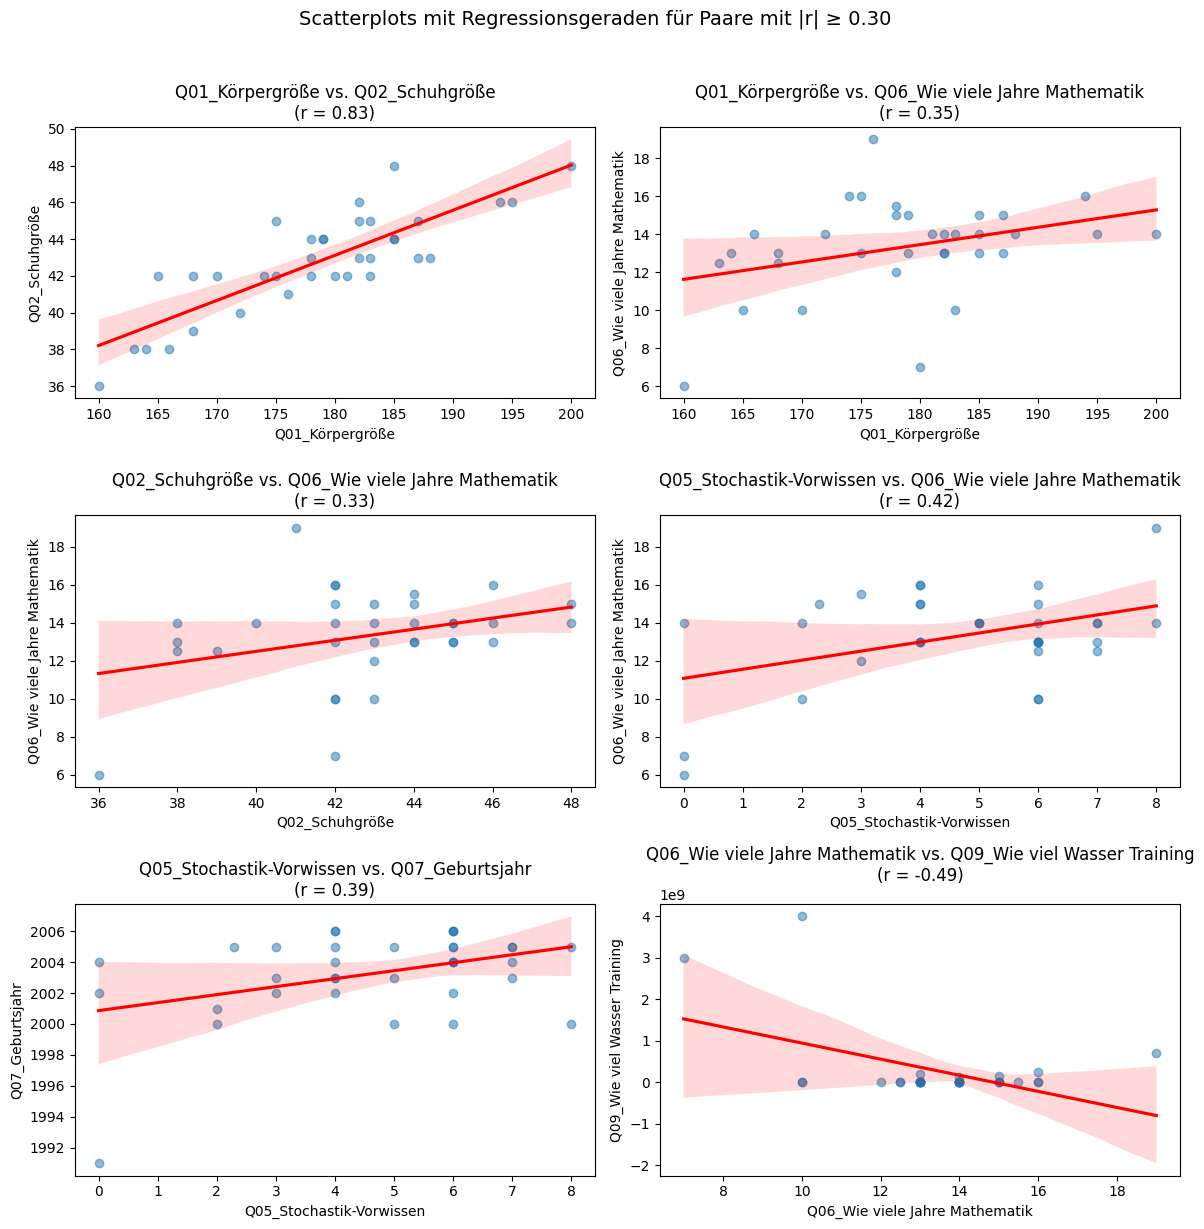

In [45]:
# Anzahl der Paare
n_paare = len(relevante_paare)

# Anzahl der Zeilen und Spalten für das Gitter berechnen
n_zeilen = int(np.ceil(n_paare / 2))
n_spalten = 2

# Gitter erstellen
fig, axes = plt.subplots(n_zeilen, n_spalten, figsize=(12, 4 * n_zeilen))
axes = axes.flatten()  # Flatten für einfache Iteration

# Plots erstellen
for i, (spalte1, spalte2, r) in enumerate(relevante_paare):
    # Scatterplot mit Regressionsgerade
    sns.regplot(
        x=spalte1,
        y=spalte2,
        data=numerische_daten,
        ax=axes[i],
        scatter_kws={'alpha': 0.5},  # Transparenz der Punkte
        line_kws={'color': 'red'}    # Farbe der Regressionsgerade
    )

    # Titel mit Korrelationskoeffizient
    axes[i].set_title(f"{spalte1} vs. {spalte2}\n(r = {r:.2f})")

    # Achsenbeschriftungen
    axes[i].set_xlabel(spalte1)
    axes[i].set_ylabel(spalte2)

# Leere Subplots ausblenden (falls ungerade Anzahl)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Titel für die gesamte Figur
fig.suptitle(f'Scatterplots mit Regressionsgeraden für Paare mit |r| ≥ {schwelle:.2f}', y=1.02, fontsize=14)

# Platz optimieren
plt.tight_layout()
plt.show()